<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: April 17, 2022\
Author: Nabilah Adani\
Class: PY-071

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

------------

# I. Exploring Dataset with Pandas

## I.1 Data Preparation

Get the NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales).

In [1]:
# import required packages and libraries

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt

# import other numerical processing packages
import numpy as np
import pandas as pd
import math
import statistics
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [2]:
# import csv dataset and view the first five rows

df = pd.read_csv('dataset/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# check columns to see what information we have

df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
# drop columns Unnamed: 0 since it has no use

df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# we will now check if there are any duplicated data

# see how many rows are within the original dataframe
print("Number of rows before duplicates removal:", len(df))

# check for duplicates and how many of them are present
duplicate_data = df[df.duplicated()]
print("Number of duplicated rows:", len(duplicate_data))

# drop all the duplicated data and see how many rows remain to check if they've been dropped successfully
df.drop_duplicates(inplace=True)
print("Number of rows after duplicates removal:", len(df))

Number of rows before duplicates removal: 84548
Number of duplicated rows: 765
Number of rows after duplicates removal: 83783


In [6]:
# we will check the data type for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         83783 non-null  int64 
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   EASE-MENT                       83783 non-null  object
 7   BUILDING CLASS AT PRESENT       83783 non-null  object
 8   ADDRESS                         83783 non-null  object
 9   APARTMENT NUMBER                83783 non-null  object
 10  ZIP CODE                        83783 non-null  int64 
 11  RESIDENTIAL UNITS               83783 non-null  int64 
 12  COMMERCIAL UNITS                83783 non-null

---

# II. Working with a Particular Group of Data
- Full descriptions of each column in this dataset can be seen [here](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf).
- Based on the PDF, note that 'Tax Class at Present' means every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.
- Note also that each borough is labelled with a particular number, with number 1 being Manhattan.
- From that information, we will work with particular group of data, that is only properties with tax class = 2, meaning that they "include all other property that is primarily residential, such as cooperatives and condominiums" and only in borough = 1 that is Manhattan.

In [7]:
# create the conditions to select only relevant rows that describe properties of tax class = 2 in Manhattan (borough = 1)

cond_man = df['BOROUGH'] == 1
cond_tax_2 = df['TAX CLASS AT TIME OF SALE'] == 2

# create the new dataframe that fulfills the 2 conditions

df_man_res = df[cond_man & cond_tax_2]
pd.DataFrame(df_man_res).head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


---

## II. 1. Data Cleaning

In [8]:
# in the new dataframe that includes only properties of tax class = 2 in Manhattan, we will check the values of sale price
# note that there are rows with " - " value which need to be cleaned

# the following code was used to view the entire unique values, so we can see if there are any other questionable values other than the non-integer ones
# pd.set_option('display.max_rows', None)
# by running that code above, we know that there are also properties whose price is below 20k, which would not make sense for a building

df_man_res['SALE PRICE'].value_counts()

 -         2881
1100000      88
750000       81
1250000      77
1300000      76
           ... 
1069162       1
533563        1
632000        1
662880        1
400530        1
Name: SALE PRICE, Length: 4279, dtype: int64

In [9]:
# check each row that has sale price of 15000

df_man_res[df_man_res['SALE PRICE'] == '15000']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
2663,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,842,7,,D4,7 EAST 14TH STREET,,...,0,0,0,-,-,1965,2,D4,15000,2017-02-14 00:00:00
4080,1,GREENWICH VILLAGE-CENTRAL,17 CONDO COOPS,2,535,1002,,R9,"14 WEST 4TH STREET, B1304",,...,0,0,0,-,-,1900,2,R9,15000,2016-09-29 00:00:00


In [10]:
# check each row that has sale price of 10

df_man_res[df_man_res['SALE PRICE'] == '10']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,...,0,0,0,-,-,1920,2,C6,10,2017-04-28 00:00:00
618,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,720,1106,,R4,468 WEST 23RD STREET,3A,...,1,0,1,-,-,1900,2,R4,10,2017-01-06 00:00:00
832,1,CHELSEA,14 RENTALS - 4-10 UNIT,2A,722,75,,S3,256 10TH AVENUE,,...,3,1,4,1146,3339,1910,2,S3,10,2017-01-27 00:00:00
1071,1,CHINATOWN,13 CONDOS - ELEVATOR APARTMENTS,2,293,1011,,R4,18 ELDRIDGE STREET,6A,...,1,0,1,-,-,2007,2,R4,10,2017-02-23 00:00:00
1072,1,CHINATOWN,14 RENTALS - 4-10 UNIT,2B,199,1,,S5,79 BAXTER STREET,,...,6,1,7,2500,9835,1890,2,S5,10,2017-01-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17315,1,UPPER WEST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1228,1007,,R4,2250 BROADWAY,1K,...,1,0,1,-,-,1987,2,R4,10,2016-09-09 00:00:00
17316,1,UPPER WEST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1228,1008,,R4,2250 BROADWAY,1L,...,1,0,1,-,-,1987,2,R4,10,2016-09-09 00:00:00
17415,1,UPPER WEST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1243,1194,,R4,215 WEST 95 STREET,3P,...,1,0,1,-,-,1986,2,R4,10,2017-06-05 00:00:00
17528,1,UPPER WEST SIDE (96-116),08 RENTALS - ELEVATOR APARTMENTS,2,1859,15,,D1,133-135 WEST 104TH STREET,,...,28,0,28,5046,30608,1950,2,D1,10,2017-01-23 00:00:00


In [11]:
# check each row that has sale price of ' -  '

df_man_res[df_man_res['SALE PRICE'] == ' -  ']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18271,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2164,1121,,R4,160 WADSWORTH AVENUE,601,...,1,0,1,-,-,0,2,R4,-,2016-12-01 00:00:00
18275,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2179,1080,,R4,255 CABRINI BOULEVARD,5J,...,1,0,1,-,-,1987,2,R4,-,2016-11-30 00:00:00
18278,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1241,,R4,736 WEST 187 STREET,204,...,1,0,1,-,-,2003,2,R4,-,2016-10-14 00:00:00
18292,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1540,,R4,105-115 BENNETT AVENUE,45B,...,1,0,1,-,-,1939,2,R4,-,2017-03-15 00:00:00


In [12]:
# we must then drop these because these must be incorrect data and therefore will affect our statistical values.

df_man_res.drop(df_man_res[df_man_res['SALE PRICE'] == ' -  '].index, inplace=True)
df_man_res.drop(df_man_res[df_man_res['SALE PRICE'] == '10'].index, inplace=True)
df_man_res.drop(df_man_res[df_man_res['SALE PRICE'] == '15000'].index, inplace=True)
df_man_res

C:\Users\nadani2\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18295,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1544,,R4,105 BENNETT AVENUE,52A,...,1,0,1,-,-,1939,2,R4,594658,2017-02-16 00:00:00
18296,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1551,,R4,105 BENNETT AVENUE,55B,...,1,0,1,-,-,1939,2,R4,560000,2017-02-22 00:00:00
18297,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1559,,R4,105 BENNETT AVENUE,64A,...,1,0,1,-,-,1939,2,R4,475000,2017-01-05 00:00:00
18298,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1565,,R4,105 BENNETT AVENUE,12HB,...,1,0,1,-,-,1939,2,R4,400530,2017-01-26 00:00:00


In [13]:
# after the sale price column was cleaned, we will change the data type of sale price column
# remember that it was previously not integer because it has '-'

df_man_res = df_man_res.astype({"SALE PRICE": int})
df_man_res.info()

# now all the data type is correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13534 entries, 0 to 18300
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         13534 non-null  int64 
 1   NEIGHBORHOOD                    13534 non-null  object
 2   BUILDING CLASS CATEGORY         13534 non-null  object
 3   TAX CLASS AT PRESENT            13534 non-null  object
 4   BLOCK                           13534 non-null  int64 
 5   LOT                             13534 non-null  int64 
 6   EASE-MENT                       13534 non-null  object
 7   BUILDING CLASS AT PRESENT       13534 non-null  object
 8   ADDRESS                         13534 non-null  object
 9   APARTMENT NUMBER                13534 non-null  object
 10  ZIP CODE                        13534 non-null  int64 
 11  RESIDENTIAL UNITS               13534 non-null  int64 
 12  COMMERCIAL UNITS                13534 non-null

---

# III. Statistical Analysis

## III. 1. Descriptive Statistics

### **Central Tendencies (Mean, Modus, Median) & Measure of Spread (Range, Variance, Standard Deviation)**

Question:
- What are the mean, modus, median, range, variance, and standard deviation of sale price of properties with tax class = 2 in Manhattan?

In [14]:
# create new pandas series that only include column 'sale price'

saleprice = pd.Series(df_man_res['SALE PRICE'])
saleprice

0         6625000
3         3936272
4         8000000
6         3192840
9        16232000
           ...   
18295      594658
18296      560000
18297      475000
18298      400530
18300     2000000
Name: SALE PRICE, Length: 13534, dtype: int32

In [15]:
# measure central tendencies and measures of spread

# mean calculation using pandas
print("Mean:", saleprice.mean())

# median calculation using pandas
print("Median:", saleprice.median())

# mode calculation using statistics
print("Mode:", statistics.mode(saleprice)) # with statistics

# range calculation using numpy
saleprice_np = np.array(saleprice)
print("Range:", np.ptp(saleprice_np))

# variance calculation using pandas
# because this is a population data and not sample data, we will use ddof=0
print("Variance:", saleprice.var(ddof=0))

# standard deviation calculation using pandas
print("Standard deviation:", saleprice.std())

Mean: 2454378.8249593615
Median: 1137500.0
Mode: 1100000
Range: 619999999
Variance: 57110278474706.53
Standard deviation: 7557413.482797215


Answer:
- Mean of sale price of properties with tax class 2 in Manhattan: 2454378.8249593615
- Median of sale price of properties with tax class 2 in Manhattan: 1137500.0
- Mode of sale price of properties with tax class 2 in Manhattan: 1100000
- Range of sale price of properties of tax class 2 in Manhattan: 619999999
- Variance of sale price of properties with tax class 2 in Manhattan: 57110278474706.53
- Standard deviation of sale price of properties with tax class 2 in Manhattan: 7557413.482797215

---

## III. 2. Probability Distribution & Box Plot
Question:
- **For every neighborhood in Manhattan**, how is the distribution of sale price for properties that have tax class = 2?

Text(0.5, 1.0, 'Probability Distribution of Sale Price Per Neighborhood, Properties of Tax Class = 2 in Manhattan, Sold from 2016-2017')

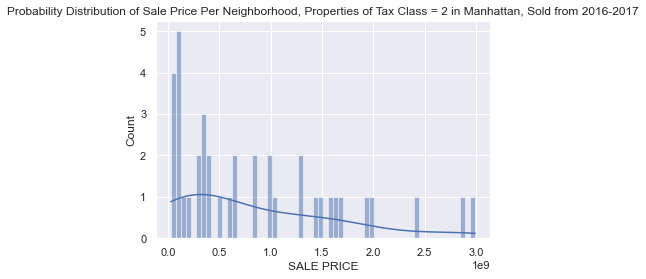

In [16]:
# group the dataset according to its neighborhood, then sum the sale price

man_res_hood = df_man_res.groupby('NEIGHBORHOOD')['SALE PRICE'].sum()

# plot the probability distribution

sns.histplot(man_res_hood, kde=True, bins=60)
plt.title("Probability Distribution of Sale Price Per Neighborhood, Properties of Tax Class = 2 in Manhattan, Sold from 2016-2017")

Text(0.5, 1.0, 'Total Sale Price Per Neighborhood of Properties with Tax Class = 2 in Manhattan Sold From 2016 - 2017')

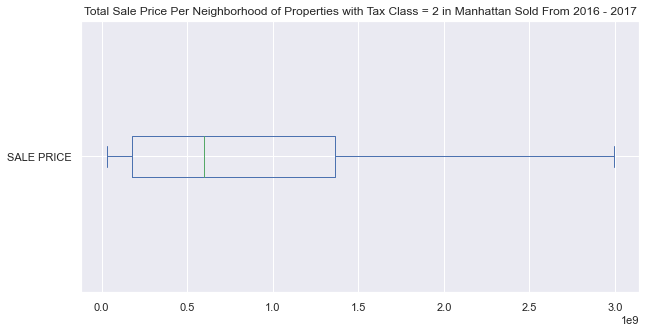

In [17]:
# create the box plot

man_res_hood.plot(kind="box", 
                  vert=False, 
                  figsize = [10,5])
plt.title("Total Sale Price Per Neighborhood of Properties with Tax Class = 2 in Manhattan Sold From 2016 - 2017")

Answer:
- The probability distribution shows gamma distribution. This means, most neighborhoods in Manhattan have tax class = 2 properties whose total sale prices are minimum, where there are several neighborhoods that have higher prices, and very few have even the highest prices.
- The box plot also shows that more data are closer to the minimum values. There is also no outlier observed.

---

## III. 3. Inferential Statistics

### **Confidence Intervals**

#### *a. Proportion Confidence Interval*
Question:
- What is the range percentage of units with tax class = 2 in Manhattan with prices above 2 million?

In [18]:
# remember that we have created a dataframe which includes only properties with tax class = 2 in Manhattan
# from that dataframe, calculate only the number of properties whose price is above 2 million

df_man_above_2mio = df_man_res[df_man_res['SALE PRICE'] > 2000000]
print("Above 2 mio:", len(df_man_above_2mio))

# then, from that dataframe, calculate only the number of properties whose price is below 2 million

df_man_below_2mio = df_man_res[df_man_res['SALE PRICE'] <= 2000000]
print("Below 2 mio:", len(df_man_below_2mio))

Above 2 mio: 3880
Below 2 mio: 9654


In [19]:
# now start the calculation

# number of samples = total of all properties of tax class 2 in Manhattan
n_above_2mio = 3880
n_below_2mio = 9654
n = n_above_2mio + n_below_2mio

# proportion = number of properties with tax class 2 in manhattan / number of samples
p = n_above_2mio / n

# best estimate = proportion
be = p

# z-score, here we use confidence 95%, therefore the value is 1.96
z = 1.96

# standard error
se = np.sqrt(p * (1-p) / n)

# mean error
me = z * se

print((be - me, be + me))

(0.2790665893412306, 0.29430418057158164)


Answer:
- There are 27.9 - 29.4% of units with tax class = 2 in Manhattan with prices above 2 million.

---

#### *b. Mean Confidence Interval*
Question:
- What is the range average sale price of units with tax class = 2 in Manhattan?

In [20]:
# calculate mean, standard deviation, and size of data using aggregate function in numpy

df_man_res.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                 mean           std   size
BOROUGH                                   
1        2.454379e+06  7.557413e+06  13534

In [21]:
# calculate the mean confidence interval

# best estimate = mean
be = 2.454379e+06

# z-score is taken from confidence 95%
z = 1.96

# standard error = standard deviation / square root of number of data
se = 7.557413e+06 / np.sqrt(13534)

# mean = z-score * standard error
me = z * se

print((be - me, be + me))

(2327053.279730659, 2581704.720269341)


Answer:
- Average price of properties with tax class = 2 in Manhattan is between 2,327,053 and 2,581,704.

---

## III. 4. **Hypothesis Testing**

- Question: Is the proportion of residential units with tax class = 2 in Manhattan sold from 2016 to 2017 with more than 1 unit less than 10%?
    - Null hypothesis (H0), pnull: u = 10%
    - Alternative hypothesis (H1), phat: u < 10%

In [22]:
# first, look at the values in residential units
# note that there are 7198 data that have zero residential units

df_man_res['RESIDENTIAL UNITS'].value_counts()

0      7198
1      5821
4        59
10       45
8        32
       ... 
102       1
121       1
55        1
27        1
64        1
Name: RESIDENTIAL UNITS, Length: 90, dtype: int64

In [23]:
# create new df that only has units with residential units (more than zero)

df_man_res_non_comm = df_man_res[df_man_res['RESIDENTIAL UNITS'] > 0]
df_man_res_non_comm['RESIDENTIAL UNITS'].value_counts()

1      5821
4        59
10       45
8        32
20       25
       ... 
102       1
121       1
55        1
27        1
64        1
Name: RESIDENTIAL UNITS, Length: 89, dtype: int64

In [24]:
# start the hypothesis testing

# number of all residential units
n = len(df_man_res_non_comm)

# number of residential units that have more than 1 unit
n_above_1 = len(df_man_res_non_comm[df_man_res_non_comm['RESIDENTIAL UNITS'] > 1])

# alternative proportion & null proportion
phat = n_above_1 / n
pnull = 0.1

# see that phat is 8%, so yes it's <10%, but next step is we need to check first is 8% is significantly different from 10%
print(n, n_above_1, phat, pnull)

6336 515 0.08128156565656566 0.1


In [25]:
# define alpha
# using confidence = 95%, error rate = 5%, therefore alpha = 0.05
alpha = 0.05

# look for p-value using statsmodels; use the 2nd value
zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='smaller')

# then compare p-value with alpha
if (pvalue < alpha):
    print("REJECT null hypothesis. There is significant difference between phat and pnull. Proportion of units that have more than 1 unit is less than 10%.")
else:
    print("FAIL to reject null hypothesis. The difference between phat and pnull is insignificant. We're not sure if the proportion of units that have more than 1 unit is less than 10%.")

REJECT null hypothesis. There is significant difference between phat and pnull. Proportion of units that have more than 1 unit is less than 10%.


Answer:
- It is probable that there are less than 10% of units with tax class = 2 sold in Manhattan between 2016 - 2017.

---

# IV. Conclusion

- In this assignment, we analyze properties that are primarily residential such as co-ops and condos ('TAX CLASS AT TIME OF SALE' = 2) in Manhattan, NYC ('BOROUGH' = 1).
- In terms of their sale prices, the following were found:
    - Mean of sale price of properties with tax class 2 in Manhattan: 2454378.8
    - Median of sale price of properties with tax class 2 in Manhattan: 1137500.0
    - Mode of sale price of properties with tax class 2 in Manhattan: 1100000
    - Range of sale price of properties of tax class 2 in Manhattan: 619999999
    - Variance of sale price of properties with tax class 2 in Manhattan: 57110278474706.5
    - Standard deviation of sale price of properties with tax class 2 in Manhattan: 7557413.5
    - Based on the probability distribution and box plot, most neighborhoods in Manhattan have properties whose total sale prices are relatively low. However, there are several neighborhoods that have higher prices, and very few have the highest prices. There is, however, no neighborhood that shows total sale prices that are way above or way below the others.
    - Average price of properties with tax class = 2 in Manhattan is between 2,327,053 and 2,581,704.
    - There are 27.9 - 29.4% of units with tax class = 2 in Manhattan with prices above 2 million.
- In terms of their number of residential units, the following was found:
    - It is probable that there are less than 10% of units with tax class = 2 sold in Manhattan between 2016 - 2017.
    
---